In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plot
from matplotlib import style

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:/Users/ASUS/Desktop/Backorder/Backorder_1.csv")

In [4]:
df

,current_inventory,transit_duration,transit_quantity,forecast_sales_3_months,forecast_sales_6_months,forecast_sales_9_months,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,prior_sales_9_month,...,source_overdue,source_performance_6_months,source_performance_12_months,stock_overdue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.84,0.83,0.0,0,0,0,1,0,0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,0,0,0,1,0,0
2,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.84,0.83,0.0,1,0,0,1,0,0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,0,0,0,1,0,0
4,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.84,0.83,0.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,...,0.0,0.69,0.69,5.0,1,0,0,1,0,0
1687856,-1.0,8.0,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,...,0.0,0.84,0.83,1.0,0,0,0,1,0,0
1687857,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,...,0.0,0.86,0.84,1.0,1,0,0,0,0,1
1687858,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,...,0.0,0.86,0.84,6.0,0,0,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687860 entries, 0 to 1687859
Data columns (total 22 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   current_inventory             1687860 non-null  float64
 1   transit_duration              1687860 non-null  float64
 2   transit_quantity              1687860 non-null  float64
 3   forecast_sales_3_months       1687860 non-null  float64
 4   forecast_sales_6_months       1687860 non-null  float64
 5   forecast_sales_9_months       1687860 non-null  float64
 6   prior_sales_1_month           1687860 non-null  float64
 7   prior_sales_3_month           1687860 non-null  float64
 8   prior_sales_6_month           1687860 non-null  float64
 9   prior_sales_9_month           1687860 non-null  float64
 10  minimum_recommend_stock       1687860 non-null  float64
 11  source_has_issue              1687860 non-null  int64  
 12  source_overdue              

Finding correlation between source_performance_6_months and source_performance_12_months

In [6]:
sourceperf_corr_df = df[['source_performance_6_months', 'source_performance_12_months']]
sourceperf_corr = sourceperf_corr_df.corr()
sourceperf_corr

,source_performance_6_months,source_performance_12_months
source_performance_6_months,1.000000,0.945335
source_performance_12_months,0.945335,1.000000


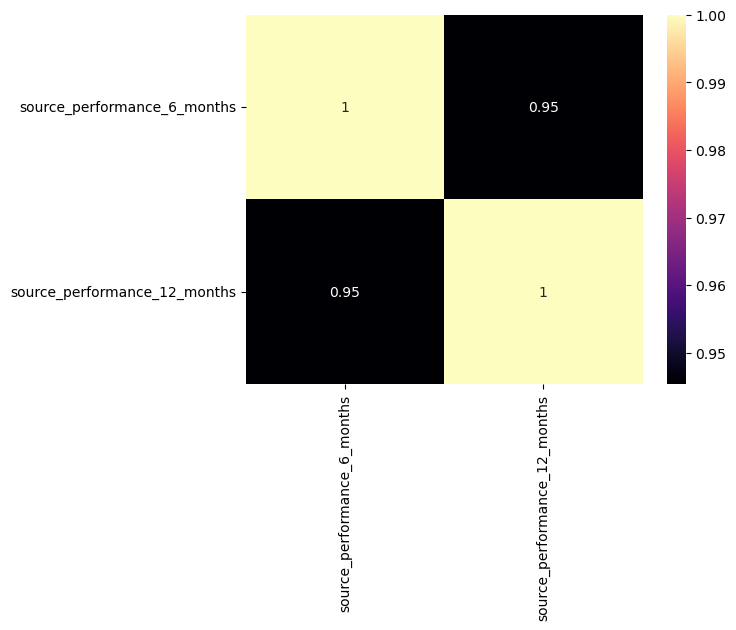

In [7]:
corr_plot = sns.heatmap(sourceperf_corr, annot = True,cmap='magma')
corr_plot.figure.savefig('corr1.png', dpi=500,bbox_inches='tight')

We can see that the expected performance over 6 and 12 months periods are highly correlated

In [8]:
prior_sales_corr_df = df[['prior_sales_1_month', 'prior_sales_3_month', 'prior_sales_6_month',
                                        'prior_sales_9_month']]
prior_sales_corr = prior_sales_corr_df.corr()
prior_sales_corr

,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,prior_sales_9_month
prior_sales_1_month,1.000000,0.918548,0.867479,0.815959
prior_sales_3_month,0.918548,1.000000,0.975594,0.929491
prior_sales_6_month,0.867479,0.975594,1.000000,0.971833
prior_sales_9_month,0.815959,0.929491,0.971833,1.000000


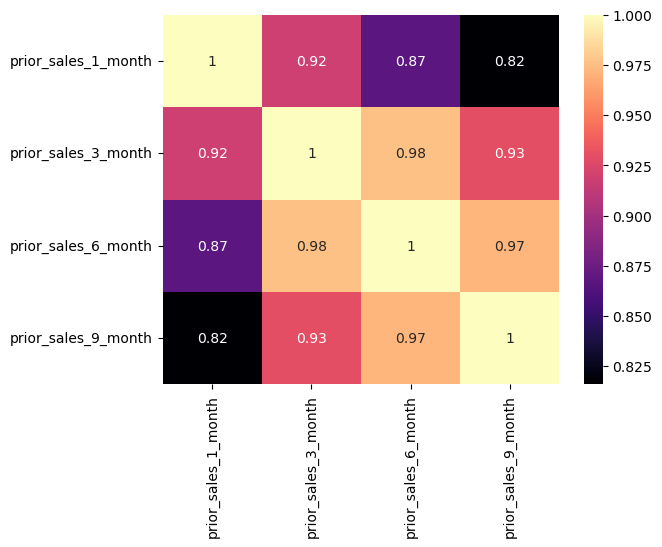

In [9]:
corr_plot_2 = sns.heatmap(prior_sales_corr, annot = True,cmap='magma')
corr_plot_2.figure.savefig('corr22.png', dpi=500,bbox_inches='tight')

We can see all sales are highly correlated

Transit duration vs backorder

<AxesSubplot:title={'center':'impact of transit time on backorder'}, xlabel='transit_duration'>

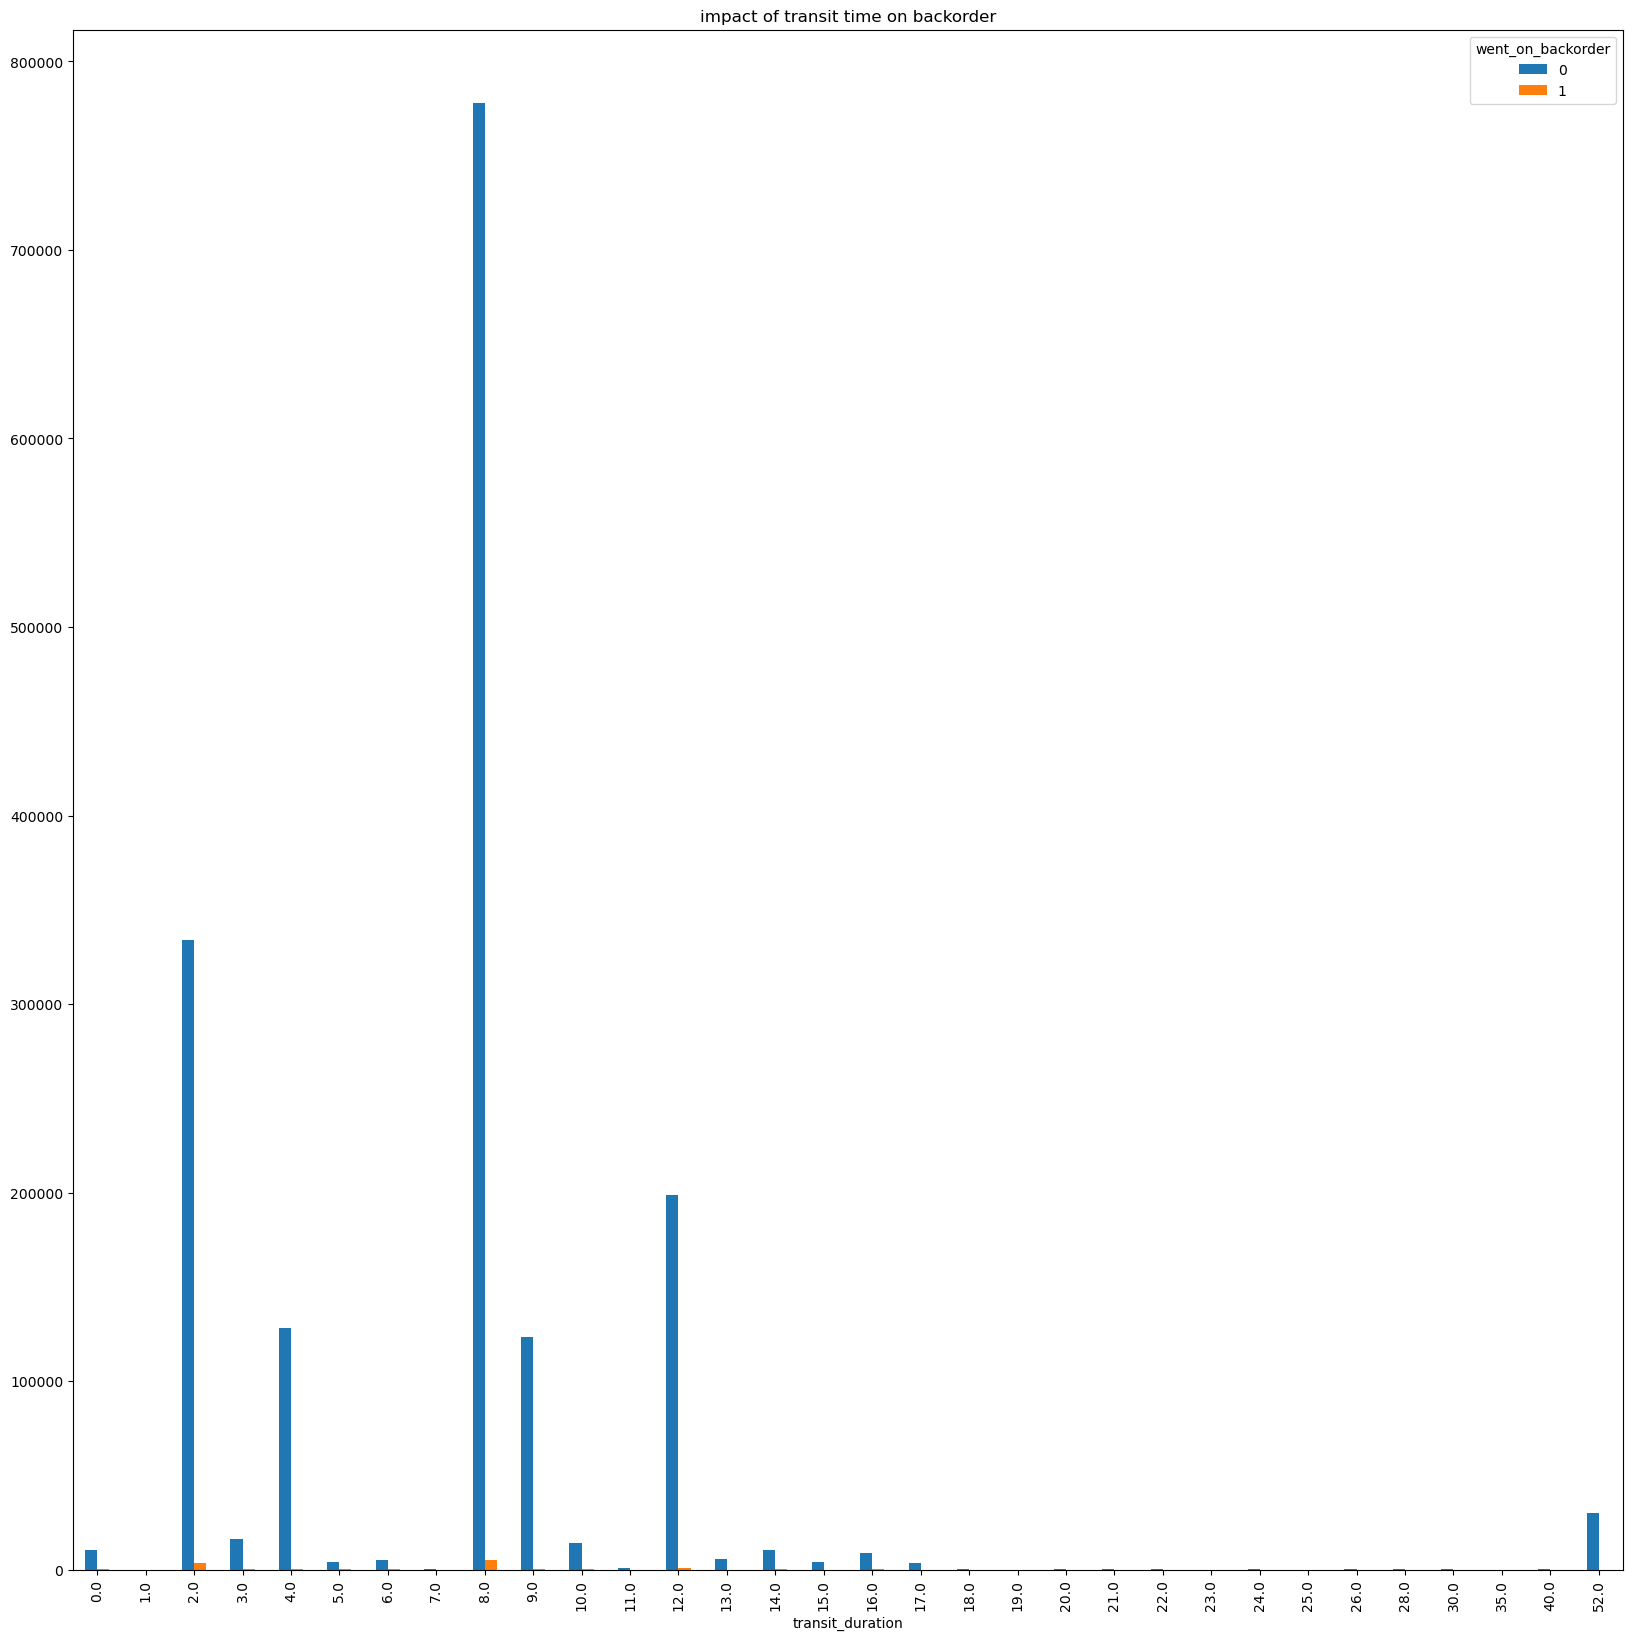

In [10]:
#The transit time is the time in days that is required to deliver goods from our  premises to the customer location. 
pd.crosstab(df.transit_duration,df.went_on_backorder).plot(kind='bar',title='impact of transit time on backorder',figsize=(20,20))

We see that most of favourable transit time are 8 days , then 2 days ,then 12 days.
We can conclude that within 12 days company should deliver the product for customer satisfaction

Transit quantity vs backorder

<AxesSubplot:title={'center':'amount of product in transit impact on backorder'}, xlabel='went_on_backorder'>

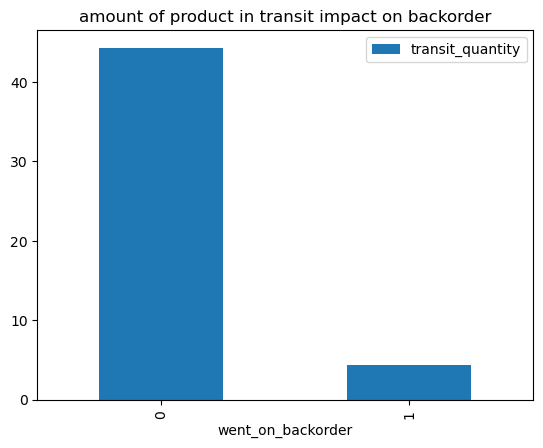

In [11]:
#transit_quantity –Amount of product in transit from source
d=df.pivot_table(index='went_on_backorder',aggfunc={'transit_quantity':'mean'})
d.plot.bar(title='amount of product in transit impact on backorder')

those product went in backorder list on avarage 3 products are in_transit

Forecast vs backorder

<AxesSubplot:title={'center':'mean forcast of 3,6,9 months quatity on backorder'}, xlabel='went_on_backorder'>

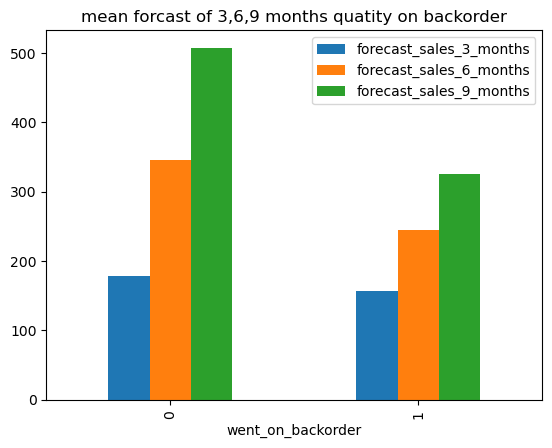

In [12]:
d=df.pivot_table(index='went_on_backorder',aggfunc={'forecast_sales_3_months':'mean','forecast_sales_6_months':'mean','forecast_sales_9_months':'mean'})
d.plot.bar(title='mean forcast of 3,6,9 months quatity on backorder')

From here we can conclude that products went on backorder whose 9 months avg forcasting is highest , so in order to fix up the stock for these product we should keep in mind for demand for next 6-9 months

SALES VS BACKORDER

<AxesSubplot:title={'center':'impact of previous 1,3,6,9 months sale backorder and non-backorder'}, xlabel='went_on_backorder'>

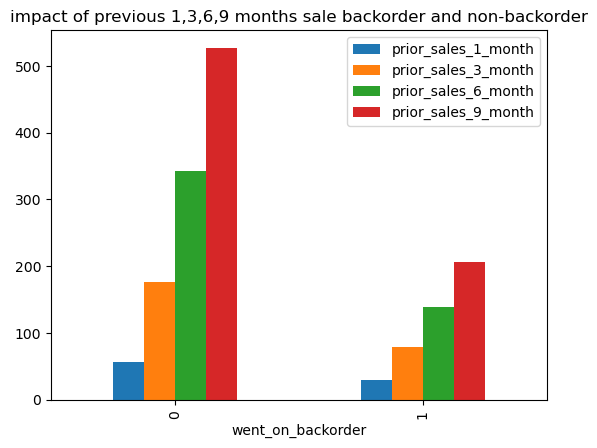

In [13]:
#what is the impact of previous 1,3,6,9 months sale backorder and non-backorder
d=df.pivot_table(index='went_on_backorder',aggfunc={'prior_sales_1_month':'mean','prior_sales_3_month':'mean','prior_sales_6_month':'mean','prior_sales_9_month':'mean'})
d.plot.bar(title='impact of previous 1,3,6,9 months sale backorder and non-backorder')

We observe that the above plot then items went on backorder have less demand in comparision non backorder

MINIMUM RECOMMENDED STOCK VS BACKORDER

<AxesSubplot:title={'center':'impact of  Minimum recommend amount of stocks on backorder items '}, xlabel='went_on_backorder'>

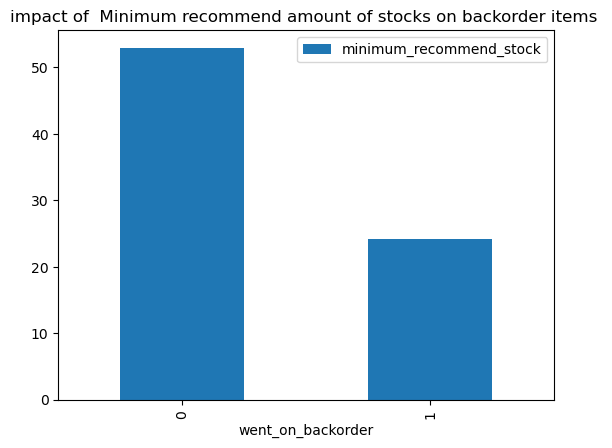

In [15]:
#minimum_recommend_stock –Minimum recommend amount to stock
#relationship b/w  Minimum recommend amount to stock to backorder items 
d=df.pivot_table(index='went_on_backorder',aggfunc={'minimum_recommend_stock':'mean'})
d.plot.bar(title='impact of  Minimum recommend amount of stocks on backorder items ')

CURRENT INVENTORY AND MINIMUM RECOMMEND STOCK VS BACKORDER

(0.0, 5000.0)

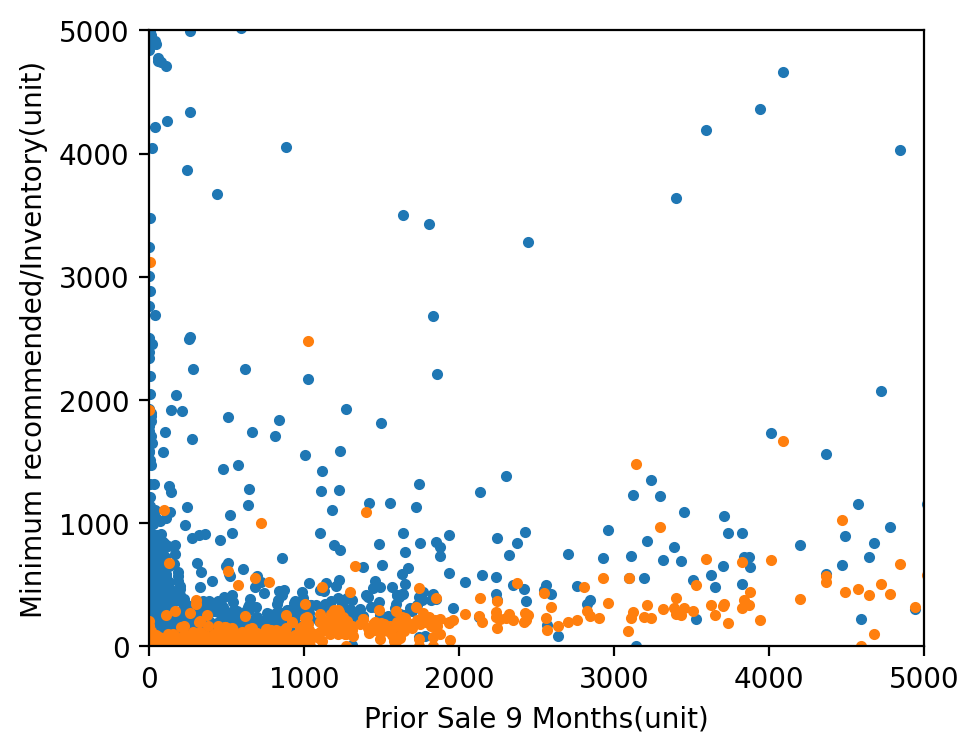

In [20]:
subset_data = df.sample(5000)
plot.figure(figsize=(5,4),dpi=200)

plot.plot(subset_data.prior_sales_9_month, subset_data.current_inventory, marker = '.', linestyle = 'None' )
plot.xlabel('Prior Sale 9 Months(unit)')
plot.ylabel('Current Inventory(unit)')
plot.plot(subset_data.prior_sales_9_month, subset_data.minimum_recommend_stock, marker = '.', linestyle = 'None' )
plot.xlabel('Prior Sale 9 Months(unit)')
plot.ylabel('Minimum recommended/Inventory(unit)')
plot.xlim(0,5000)
plot.ylim(0,5000)

Here there are couples of observations can be drawn:

1. There are few sku's wherein the current inventory is high even when there are no prior 9 months sale.

2. Similarly, the recommended the stock for few skus are high even when there are no prior 9 months sale for these products

This is an interesting obeservation can be presented to the client, this could probably might be data issue.

FEATURE SELECTION

In [21]:
#Calculating the percentage of repeatitions of 0's in each column
perct_0 = {column: '%2.2f' %(((df[column] == 0).sum()/df.shape[0])*100)+'%' for column in df.columns
                             if df[column].dtype == np.float64}

In [22]:
perct_0

{'current_inventory': '6.42%',
 'transit_duration': '0.62%',
 'transit_quantity': '79.67%',
 'forecast_sales_3_months': '69.78%',
 'forecast_sales_6_months': '64.23%',
 'forecast_sales_9_months': '61.22%',
 'prior_sales_1_month': '56.87%',
 'prior_sales_3_month': '44.98%',
 'prior_sales_6_month': '38.33%',
 'prior_sales_9_month': '34.72%',
 'minimum_recommend_stock': '51.68%',
 'source_overdue': '98.50%',
 'source_performance_6_months': '2.31%',
 'source_performance_12_months': '1.95%',
 'stock_overdue': '98.62%'}

In [23]:
#Dropping the columns with the percentage of 0's more than 70%
df = df.drop(['transit_quantity', 'source_overdue', 'stock_overdue'], axis = 1)

In [24]:
df

,current_inventory,transit_duration,forecast_sales_3_months,forecast_sales_6_months,forecast_sales_9_months,prior_sales_1_month,prior_sales_3_month,prior_sales_6_month,prior_sales_9_month,minimum_recommend_stock,source_has_issue,source_performance_6_months,source_performance_12_months,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.84,0.83,0,0,0,1,0,0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.99,0.99,0,0,0,1,0,0
2,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.84,0.83,1,0,0,1,0,0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.10,0.13,0,0,0,1,0,0
4,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0,0.84,0.83,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,0.0,2.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,0.0,0,0.69,0.69,1,0,0,1,0,0
1687856,-1.0,8.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,0,0.84,0.83,0,0,0,1,0,0
1687857,-1.0,9.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,0,0.86,0.84,1,0,0,0,0,1
1687858,62.0,9.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,0,0.86,0.84,0,0,0,1,0,0


CHI-SQUARED TEST FOR CATEGORICAL FEATURES

Realtionship with deck_risk, ppap_risk and stop_auto_buy with the outcome variable went_backorder

Inorder to further understand the relationship between the categorical variable with the outcome variable, we can start using the crosstabulation and chi-square test.

Ho ----> Feature are independent, no association between the variables exists

H1 ----> Feature are not independent; there is an association between the variable exists.

In [25]:
df.to_csv('Backorder_2.csv', index = False)